This example file shows the process of typicle built-in strategy optimizaiton: 
- creating an operator object with built-in strategies
- set up context object for optimization settings
- find out and back-test optimal result based on historical data

In [1]:
import sys
sys.path.append('../')
import qteasy as qt
import numpy as np
import pandas as pd
%matplotlib inline

Module qteasy has been loaded successfully!, version: 0.1
pandas version: 0.25.1
numpy version: 1.17.2
tushare version: 1.2.48


In [2]:
cont = qt.Context(moq=0)
cont.reference_asset = '000300.SH'
cont.reference_asset_type = 'I'
cont.share_pool = '000300.SH'
cont.asset_type = 'I'
cont.output_count = 30
cont.invest_start = '20020101'
cont.parallel = True
cont.print_log = True
cont.moq = 0
cont.rate = qt.Cost(buy_fix=0.0, buy_rate=0.0015, buy_min=0.0,
                 sell_fix=0.0, sell_rate=0.0, sell_min=0.0,
                 slipage=0.0)

In [3]:
op = qt.Operator(timing_types=['dma'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (10, 250)])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')

op.set_parameter(stg_id='t-0', pars=(96, 111, 64))
op.set_parameter('r-0', pars=(8, -0.1443033))
# cont.mode = 1
# run(op, cont)

print(f'============SEARCHING FOR DMA PARAMS==============\n'
      f'==================================================')
cont.mode = 2
cont.opti_method = 1
cont.opti_method_sample_size = 100
cont.opti_method_step_size = 32
cont.opti_method_init_step_size = 16
cont.opti_method_min_step_size = 1
cont.opti_method_incre_ratio = 2
perfs_dma, pars_dma = qt.run(op, cont)

============SEARCHING FOR DMA PARAMS==============
Getting price type historical data...
Getting price type historical data...
       RUNNING IN MODE 2
      --Optimization Mode--



../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:76: RuntimeWarning: invalid value encountered in true_divide
  return arr / s.reshape(shape)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide


Optimization progress: [########--------------------------------] 20/100. 20.0%  best performance: 82602.545

../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)


Optimization progress: [########################################] 100/100. 100.0%  best performance: 91818.299
Optimization completed, total time consumption: 5"435

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 5.170 times better than the least performing result
best result: 91818.299 obtained at parameter: 
(99, 115, 58)
least result: 17760.475 obtained at parameter: 
(152, 72, 24)
complete list of performance and parameters are following, 
                           0
(152, 72, 24)   17760.474518
(55, 48, 93)    17820.998274
(23, 39, 121)   18110.977606
(228, 201, 40)  19588.989206
(68, 99, 57)    20326.751510
(25, 87, 73)    20427.859361
(28, 14, 148)   21825.736521
(131, 58, 13)   22099.680102
(38, 184, 86)   23095.746669
(121, 136, 17)  23115.178822
(48, 107, 71)   25524.241179
(42, 136, 90)   28037.417871
(124, 125, 28)  30083.144019
(89, 12, 33)    30805.343387
(83, 148, 60)   31218.933589
(66, 207, 27)

In [7]:
# find out best performers for strategy macd

print(f'==================SEARCHING FOR MACD PARAMS===================\n'
      f'==============================================================')
op = qt.Operator(timing_types=['macd'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (10, 250)])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')
op.set_parameter(stg_id='t-0', pars=(96, 111, 64))
op.set_parameter('r-0', pars=(8, -0.1443033))

cont.mode = 2
perfs_macd, pars_macd = qt.run(op, cont)

# find out best performers for strategy trix
print(f'==================SEARCHING FOR TRIX PARAMS===================\n'
      f'==============================================================')
op = qt.Operator(timing_types=['trix'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(5, 50), (10, 150)])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')
op.set_parameter(stg_id='t-0', pars=(50, 34))
op.set_parameter('r-0', pars=(8, -0.1443033))

cont.mode = 2
cont.opti_method_sample_size = 100
perfs_trix, pars_trix = qt.run(op, cont)

# find out best performers for strategy crossline
print(f'===============SEARCHING FOR CROSSLINE PARAMS=================\n'
      f'==============================================================')
op = qt.Operator(timing_types=['crossline'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=1, par_boes=[(10, 250), (10, 250), (0.0, 10.0), ('buy', 'sell', 'none')])
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'none')
op.set_parameter(stg_id='t-0', pars=(97, 124, 3.8286731572085966, 'buy'))
op.set_parameter('r-0', pars=(8, -0.1443033))

cont.mode = 2
perfs_cl, pars_cl = qt.run(op, cont)

# find out best performance with all four strategies combined:

==================SEARCHING FOR MACD PARAMS===================
Getting price type historical data...
Getting price type historical data...
       RUNNING IN MODE 2
      --Optimization Mode--



../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.whe

Optimization progress: [########--------------------------------] 20/100. 20.0%  best performance: 42854.286

../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)


Optimization progress: [########################################] 100/100. 100.0%  best performance: 52036.317
Optimization completed, total time consumption: 6"358

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 3.569 times better than the least performing result
best result: 52036.317 obtained at parameter: 
(104, 225, 38)
least result: 14579.706 obtained at parameter: 
(153, 118, 78)
complete list of performance and parameters are following, 
                           0
(153, 118, 78)  14579.706463
(145, 44, 29)   14597.505974
(121, 120, 93)  14700.098284
(156, 20, 19)   15757.212821
(33, 13, 143)   16325.815028
(207, 105, 14)  17546.493673
(199, 179, 10)  17952.334395
(248, 107, 23)  18355.979986
(103, 67, 44)   19164.850088
(65, 17, 62)    19298.588216
(94, 23, 15)    20096.307629
(83, 32, 97)    20491.699991
(115, 23, 87)   23581.446906
(48, 213, 15)   26624.078628
(42, 16, 23)    27058.231647
(20, 60, 47

../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.whe

Optimization progress: [########################################] 100/100. 100.0%  best performance: 56420.157
Optimization completed, total time consumption: 7"069

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 1.511 times better than the least performing result
best result: 56420.157 obtained at parameter: 
(7, 29)
least result: 37341.047 obtained at parameter: 
(29, 149)
complete list of performance and parameters are following, 
                      0
(29, 149)  37341.047494
(45, 54)   37714.108873
(29, 116)  37728.470336
(40, 60)   37940.760793
(40, 128)  38293.567102
(40, 125)  38479.082935
(36, 142)  38623.820771
(16, 10)   38883.761334
(11, 25)   39291.015460
(43, 49)   39769.875020
(24, 109)  40296.898333
(6, 27)    40297.124453
(42, 132)  40422.824457
(12, 13)   40578.022152
(34, 142)  40711.966475
(49, 51)   40779.549515
(45, 106)  41196.469735
(45, 110)  41210.461436
(26, 149)  42175.994284
(5, 36)

../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: invalid value encountered in true_divide
  op = np.where(op < 0, (op / np.roll(lst, shift=1, axis=1)), op)
../qteasy/utilfuncs.py:57: RuntimeWarning: divide by zero encountered in true_divide
  op = np.wh

Optimization progress: [########################################] 100/100. 100.0%  best performance: 38429.169
Optimization completed, total time consumption: 4"634

==========SEARCHING FINISHED===============
Searching finished, 30 best results are generated
The best parameter performs 1.501 times better than the least performing result
best result: 38429.169 obtained at parameter: 
(74, 82, 7.36233771379796, 'none')
least result: 25607.475 obtained at parameter: 
(122, 196, 4.9117750760839485, 'none')
complete list of performance and parameters are following, 
                                                 0
(122, 196, 4.9117750760839485, none)  25607.474581
(169, 202, 3.191832184836527, buy)    25692.439343
(142, 237, 8.825679643409037, none)   25791.238995
(183, 209, 7.822374795691296, none)   25831.823071
(97, 164, 6.742516439162038, none)    26605.827060
(176, 209, 4.975222789967125, none)   26692.403905
(53, 71, 5.42228002367477, none)      26843.854693
(10, 203, 1.96313842383

===============SEARCHING FOR COMBINED PARAMS==================
parameter enums:
dma: 
[(152, 72, 24), (55, 48, 93), (23, 39, 121), (228, 201, 40), (68, 99, 57), (25, 87, 73), (28, 14, 148), (131, 58, 13), (38, 184, 86), (121, 136, 17), (48, 107, 71), (42, 136, 90), (124, 125, 28), (89, 12, 33), (83, 148, 60), (66, 207, 27), (36, 142, 16), (109, 119, 24), (52, 227, 38), (59, 112, 66), (120, 151, 56), (19, 28, 204), (167, 179, 13), (122, 165, 90), (78, 135, 73), (91, 221, 39), (117, 151, 83), (86, 127, 125), (141, 181, 40), (99, 115, 58)]
macd:
[(153, 118, 78), (145, 44, 29), (121, 120, 93), (156, 20, 19), (33, 13, 143), (207, 105, 14), (199, 179, 10), (248, 107, 23), (103, 67, 44), (65, 17, 62), (94, 23, 15), (83, 32, 97), (115, 23, 87), (48, 213, 15), (42, 16, 23), (20, 60, 47), (64, 233, 21), (55, 66, 86), (120, 155, 13), (20, 75, 195), (65, 160, 48), (70, 114, 103), (80, 197, 59), (26, 111, 108), (32, 109, 114), (13, 176, 13), (44, 106, 106), (130, 230, 29), (95, 227, 43), (104, 225,

且资产价格为: [4102.4]
本期交易信号[-0.25]
以本期资产价格[4102.4]出售资产 [8.15]
获得现金:33436.42, 产生交易费用 0.00, 交易后现金余额: 33436.42136124995
本期计划买入资产动用资金: 0.00
以本期资产价格[4102.4]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 33436.42, 期末总资产: 133745.69

交易日期:2017/11/28
考虑现金增值, 上期现金: 33436.42, 经过5天后现金增值到33456.48
本期期初总资产: 132626.97，其中包括: 
期初现金: 33456.48, 
期初持有资产: [24.45]
且资产价格为: [4055.82]
本期交易信号[-0.33]
以本期资产价格[4055.82]出售资产 [8.15]
获得现金:33056.83, 产生交易费用 0.00, 交易后现金余额: 66513.31236433939
本期计划买入资产动用资金: 0.00
以本期资产价格[4055.82]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 66513.31, 期末总资产: 132626.97

交易日期:2017/12/13
考虑现金增值, 上期现金: 66513.31, 经过15天后现金增值到66633.04
本期期初总资产: 132653.28，其中包括: 
期初现金: 66633.04, 
期初持有资产: [16.3]
且资产价格为: [4050.09]
本期交易信号[-0.5]
以本期资产价格[4050.09]出售资产 [8.15]
获得现金:33010.12, 产生交易费用 0.00, 交易后现金余额: 99643.15681794958
本期计划买入资产动用资金: 0.00
以本期资产价格[4050.09]买入资产 [0.]
实际花费现金 0.00 并产生交易费用: -0.00
期末现金: 99643.16, 期末总资产: 132653.28

交易日期:2017/12/18
考虑现金增值, 上期现金: 99643.16, 经过5天后现金增值到99702.94
本期期初总资产: 132184.90，其中包括: 
期初现金: 99702.94, 
期初持

yearly return is: 
173589.26555643394 / 10000 = 
0.23108074536596512
volatility is:  
0.16998623494956744
|                                  |
|          LOOPING RESULT          |
|                                  |

qteasy running mode: 1 - History back looping
time consumption for operate signal creation: 216.0ms ms
time consumption for operation back looping: 643.7ms ms

investment starts on 2007-01-11 00:00:00
ends on 2020-09-30 00:00:00
Total looped periods: 13.7 years.
operation summary:
            sell  buy  total
000300.SH    51   51    102
Total operation fee:     ¥   4,510.42
total investment amount: ¥  10,000.00
final value:             ¥ 173,589.27
Total return: 1735.893% 
Average Yearly return rate:  23.162%
Total reference return: 105.563% 
Average Yearly reference return rate: 5.389%
strategy performance indicators: 
alpha:               0.176
Beta:                1.072
Sharp ratio:         1.154
Info ratio:          0.033
250 day volatility:  0.171
Max drawdown:      

1.1535095499005525

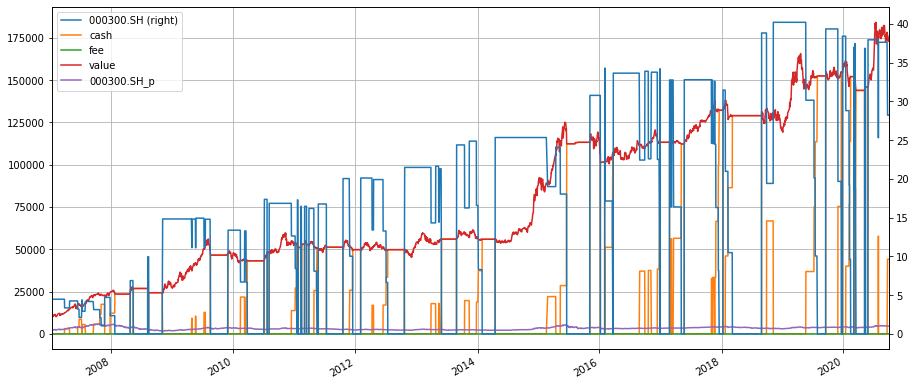

In [16]:
print(f'===============SEARCHING FOR COMBINED PARAMS==================\n'
      f'==============================================================\n'
      f'parameter enums:\n'
      f'dma: \n{pars_dma}\n'
      f'macd:\n{pars_macd}')
op = qt.Operator(timing_types=['dma', 'macd', 'trix', 'crossline'],
                 selecting_types=['all'], ricon_types=['urgent'])
op.set_parameter('s-0', pars=(2,), sample_freq='y')
op.set_parameter('t-0', opt_tag=2, par_boes=pars_dma, par_types='enum')
op.set_parameter('t-1', opt_tag=2, par_boes=pars_macd, par_types='enum')
op.set_parameter('t-2', opt_tag=2, par_boes=pars_trix, par_types='enum')
op.set_parameter('t-3', opt_tag=2, par_boes=pars_cl, par_types='enum')
op.set_parameter('r-0', opt_tag=0, par_boes=[(5, 14), (-0.2, -0.01)])

op.set_blender('ls', 'combo')
op.set_parameter(stg_id='t-0', pars=(96,111,64))
op.set_parameter(stg_id='t-1', pars=(157,188,20))
op.set_parameter(stg_id='t-2', pars=(28, 95))
op.set_parameter(stg_id='t-3', pars=(105, 109, 9.99, 'buy'))
op.set_parameter('r-0', pars=(8, -0.1443033))
print(f'=========================================\n'
      f'op object\'s opt space par is: {op.opt_space_par}\n'
      f'op object\'s par boes and par types are:\n')

cont.mode = 1
cont.opti_method = 1
cont.opti_method_sample_size = 100
cont.opti_method_step_size = 1
qt.run(op, cont)